# Disaster Corpus on Social Media Classification Project
The **Data** corpus come from the social media tweets, with the topic about Diseaster. <br>
The **Obejctive** is to predict if the tweets are really relevant to the diseaster, or just a joke or a talk about film

### Table of Contents
- **EDA Analysis**
- **Data Cleaning**
- **Models and Evaluations**

### 1. Exploratory Data Analysis

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
import warnings
warnings.filterwarnings('ignore')

data = pd.read_csv('./clean_data.csv', index_col=0)
data.head()

,text,choose_one,class_label
0,just happened a terrible car crash,Relevant,1
1,our deeds are the reason of this earthquake m...,Relevant,1
2,"heard about earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,forest fire near la ronge sask canada,Relevant,1


In [2]:
data.shape 

(10876, 3)

In [3]:
data.isnull().sum() 

text           0
choose_one     0
class_label    0
dtype: int64

- **Target Variable:** Two classes "relevant' and 'not relevant' are relatively even distributed.

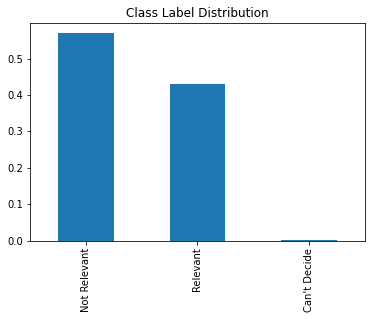

In [4]:
data.choose_one.value_counts(normalize=True).plot(kind='bar')
plt.title('Class Label Distribution')
plt.show() 

- **Sentence Length:** from the Histogram, we can see that the average length of the corpus is about 83 words

In [5]:
sent_len = [len(sent) for sent in data.text]
print('Max Sentence Length is {}'.format(max(sent_len)))
print('Average Sentence Length is {}'.format(sum(sent_len)/len(sent_len)))

Max Sentence Length is 166
Average Sentence Length is 83.70375137918353


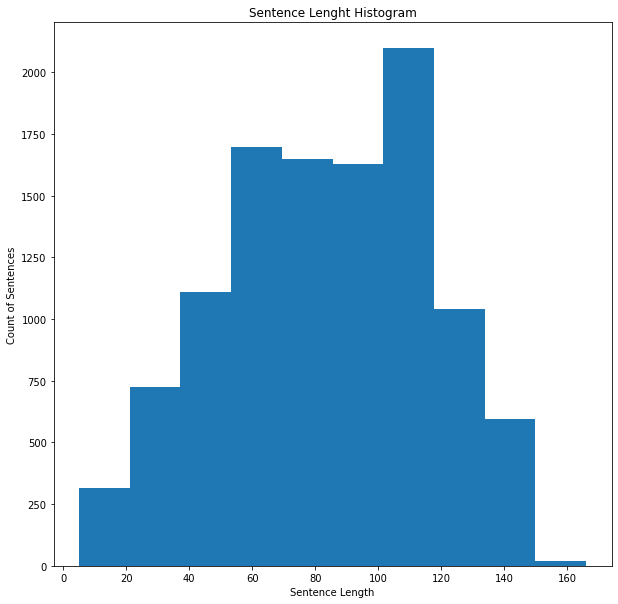

In [6]:
fig = plt.figure(figsize=(10,10))
plt.hist(sent_len)
plt.xlabel('Sentence Length')
plt.ylabel('Count of Sentences')
plt.title('Sentence Lenght Histogram')
plt.show()

- **Tokens:**

In [7]:
from nltk.corpus import stopwords

# remove symbols and other redundant signs 
def clean_text(df,col):
    df[col] = df[col].str.replace(r'http\S+','')
    df[col] = df[col].str.replace(r'http','')
    df[col] = df[col].str.replace(r'@\S+','')
    df[col] = df[col].str.replace(r'@','at')
    df[col] = df[col].str.lower()
    return df

clean_text(data,'text')

# remove stop words
stopwords = set(stopwords.words('english'))
data['text_clean'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))
data.head()

,text,choose_one,class_label,text_clean
0,just happened a terrible car crash,Relevant,1,happened terrible car crash
1,our deeds are the reason of this earthquake m...,Relevant,1,deeds reason earthquake may allah forgive us
2,"heard about earthquake is different cities, s...",Relevant,1,"heard earthquake different cities, stay safe e..."
3,"there is a forest fire at spot pond, geese are...",Relevant,1,"forest fire spot pond, geese fleeing across st..."
4,forest fire near la ronge sask canada,Relevant,1,forest fire near la ronge sask canada


In [8]:
from nltk.tokenize import RegexpTokenizer

# tokenize
tokenizer = RegexpTokenizer(r'\w+')
data['token'] = data.text.apply(tokenizer.tokenize)
data.head()

,text,choose_one,class_label,text_clean,token
0,just happened a terrible car crash,Relevant,1,happened terrible car crash,"[just, happened, a, terrible, car, crash]"
1,our deeds are the reason of this earthquake m...,Relevant,1,deeds reason earthquake may allah forgive us,"[our, deeds, are, the, reason, of, this, earth..."
2,"heard about earthquake is different cities, s...",Relevant,1,"heard earthquake different cities, stay safe e...","[heard, about, earthquake, is, different, citi..."
3,"there is a forest fire at spot pond, geese are...",Relevant,1,"forest fire spot pond, geese fleeing across st...","[there, is, a, forest, fire, at, spot, pond, g..."
4,forest fire near la ronge sask canada,Relevant,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]"


In [9]:
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('punkt')

# stemmertize tokens
def word_stemmer(text):
    stem_text = [PorterStemmer().stem(i) for i in text]
    return stem_text

data['tokens_clean'] = data['token'].apply(lambda x: word_stemmer(x))

# lemmatizer
def word_lemmatizer(text):
    lem_text = [WordNetLemmatizer().lemmatize(i) for i in text]
    return lem_text
data['tokens_clean'] = data['token'].apply(lambda x: word_lemmatizer(x))

data.head()

[nltk_data] Downloading package wordnet to /Users/liulaki/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /Users/liulaki/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,choose_one,class_label,text_clean,token,tokens_clean
0,just happened a terrible car crash,Relevant,1,happened terrible car crash,"[just, happened, a, terrible, car, crash]","[just, happened, a, terrible, car, crash]"
1,our deeds are the reason of this earthquake m...,Relevant,1,deeds reason earthquake may allah forgive us,"[our, deeds, are, the, reason, of, this, earth...","[our, deed, are, the, reason, of, this, earthq..."
2,"heard about earthquake is different cities, s...",Relevant,1,"heard earthquake different cities, stay safe e...","[heard, about, earthquake, is, different, citi...","[heard, about, earthquake, is, different, city..."
3,"there is a forest fire at spot pond, geese are...",Relevant,1,"forest fire spot pond, geese fleeing across st...","[there, is, a, forest, fire, at, spot, pond, g...","[there, is, a, forest, fire, at, spot, pond, g..."
4,forest fire near la ronge sask canada,Relevant,1,forest fire near la ronge sask canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"


In [10]:
corpus = []
for ele in data.tokens_clean:
    for word in ele:
        corpus.append(word)
vocab = set(corpus)
print('{} different words in corpus'.format(len(vocab)))
print('In total, there are {} words'.format(len(corpus)))

16545 different words in corpus
In total, there are 154724 words


### 2. Data Cleaning

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

def count_vector(data):
    count_vectorizer = CountVectorizer()
    emb = count_vectorizer.fit_transform(data)
    return emb, count_vectorizer

corpus = data.text_clean.tolist()
target = data.class_label.tolist()
X_train, X_test, y_train, y_test = train_test_split(corpus, target, random_state=0, test_size=0.2)

X_train_emb, count_vectorizer = count_vector(X_train)
X_test_emb = count_vectorizer.transform(X_test)

In [12]:
X_train_emb

<8700x15911 sparse matrix of type '<class 'numpy.int64'>'
	with 76671 stored elements in Compressed Sparse Row format>

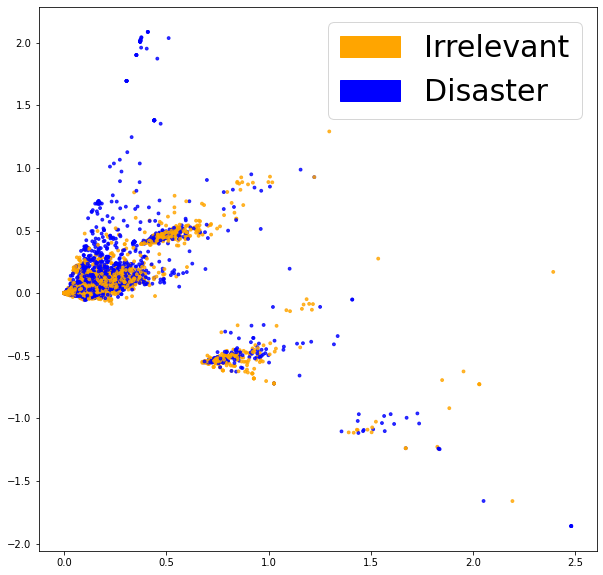

In [13]:
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib
import matplotlib.patches as mpatches


def plot_LSA(test_data, test_labels, savepath="PCA_demo.csv", plot=True):
        lsa = TruncatedSVD(n_components=2)
        lsa.fit(test_data)
        lsa_scores = lsa.transform(test_data)
        color_mapper = {label:idx for idx,label in enumerate(set(test_labels))}
        color_column = [color_mapper[label] for label in test_labels]
        colors = ['orange','blue','blue']
        if plot:
            plt.scatter(lsa_scores[:,0], lsa_scores[:,1], s=8, alpha=.8, c=test_labels, cmap=matplotlib.colors.ListedColormap(colors))
            red_patch = mpatches.Patch(color='orange', label='Irrelevant')
            green_patch = mpatches.Patch(color='blue', label='Disaster')
            plt.legend(handles=[red_patch, green_patch], prop={'size': 30})


fig = plt.figure(figsize=(10, 10))          
plot_LSA(X_train_emb, y_train)
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(multi_class='multinomial', solver='newton-cg', random_state=0)
clf.fit(X_train_emb, y_train)

y_pred = clf.predict(X_test_emb)

In [15]:
# Model Evaluation 

from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score, classification_report

def get_metrics(y_test, y_pred):
    precision = precision_score(y_test, y_pred, pos_label=None, average='weighted')
    recall = recall_score(y_test, y_pred, pos_label=None, average='weighted')
    f1 = f1_score(y_test, y_pred, pos_label=None, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    return precision, recall, f1, accuracy

precision, recall, f1, accuracy = get_metrics(y_test, y_pred)
print('accuray = %.2f, recall = %.2f, f1 = %.2f, precision = %.2f ' %(accuracy, recall, f1, precision))

accuray = 0.80, recall = 0.80, f1 = 0.80, precision = 0.80 


In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83      1265
           1       0.79      0.70      0.75       911

    accuracy                           0.80      2176
   macro avg       0.80      0.79      0.79      2176
weighted avg       0.80      0.80      0.80      2176



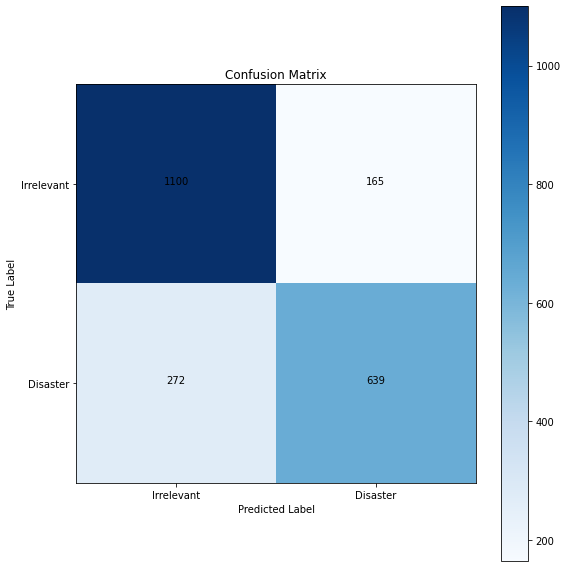

In [17]:
# plot confusion matrix
import itertools
from sklearn.metrics import confusion_matrix

def plt_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.get_cmap('Blues')):
    if normalize: 
        cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marker = np.arange(len(classes))
    plt.xticks(tick_marker, classes)
    plt.yticks(tick_marker, classes)
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max()/2.
    
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i,j], fmt), horizontalalignment='center', color='black' if cm[i,j] < thresh else 'black')
        
    plt.tight_layout()
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    
    return plt

cm = confusion_matrix(y_test, y_pred)
fig = plt.figure(figsize=(8,8))
plot = plt_confusion_matrix(cm, classes=['Irrelevant', 'Disaster'], normalize=False, title='Confusion Matrix')
plt.show()

In [23]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[:n], key = lambda x : x[0])
        bottom = sorted_coeff[-n:]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(count_vectorizer, clf, 10)

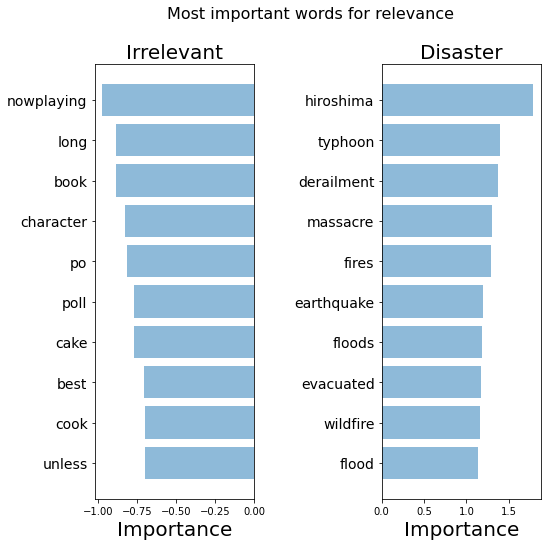

In [19]:
def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(8, 8))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Irrelevant', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Disaster', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()

top_scores = [a[0] for a in importance[1]['tops']]
top_words = [a[1] for a in importance[1]['tops']]
bottom_scores = [a[0] for a in importance[1]['bottom']]
bottom_words = [a[1] for a in importance[1]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")